In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# --- 1. Load and Preprocess the Dataset ---

# Load the IMDB dataset
# num_words: only keep the top n most frequent words
# skip_top: skip the top m most frequent words (often stop words)
# maxlen: maximum length of sequences (reviews)
max_features = 10000  # Vocabulary size (top 10,000 words)
maxlen = 200          # Consider only the first 200 words of each review

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(f"Train sequences: {len(x_train)}")
print(f"Test sequences: {len(x_test)}")

Loading data...
Train sequences: 25000
Test sequences: 25000


In [3]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
# Pad sequences to have a fixed length (maxlen)
# Shorter sequences will be padded with zeros, longer sequences truncated.
print("Pad sequences (samples x time)")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

Pad sequences (samples x time)
x_train shape: (25000, 200)
x_test shape: (25000, 200)


In [11]:
# --- 2. Build the Elman RNN Model ---

# Keras's SimpleRNN layer implements the basic Elman-style recurrence
# where the output of the hidden state at t-1 is fed back to the hidden state at t.
embedding_dim = 32 # Size of the word embedding vectors
rnn_units = 32     # Number of units in the SimpleRNN layer

model = Sequential()
# Embedding layer: Converts word indices into dense vectors of fixed size (embedding_dim)
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))

# SimpleRNN layer: The core recurrent layer
# units: the dimensionality of the output space (the hidden state size)
# return_sequences=False: we only need the final output for classification
model.add(SimpleRNN(units=rnn_units))

# Output layer: A single neuron with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# --- 3. Compile the Model ---

model.compile(optimizer='adam',       # Adam optimizer is a good default
              loss='binary_crossentropy', # Appropriate loss for binary classification
              metrics=['accuracy'])   # Track accuracy during training


In [13]:
# --- 4. Train the Model ---

print("Training model...")
batch_size = 128
epochs = 10 # Training for 10 epochs

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2) # Use 20% of training data for validation


Training model...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.5353 - loss: 0.6861 - val_accuracy: 0.7254 - val_loss: 0.5623
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8233 - loss: 0.4185 - val_accuracy: 0.8262 - val_loss: 0.3996
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8973 - loss: 0.2635 - val_accuracy: 0.8188 - val_loss: 0.4220
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9231 - loss: 0.2064 - val_accuracy: 0.8212 - val_loss: 0.4598
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9830 - loss: 0.0670 - val_accuracy: 0.8082 - val_loss: 0.5374
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9981 - loss: 0.0220 - val_accuracy: 0.8192 - val_loss: 0.5866
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9996 - loss: 0.0090 - val_accuracy: 0.8196 - val_loss: 0.6357
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9998 

In [8]:
# --- 5. Evaluate the Model ---

print("\nEvaluating model...")
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating model...
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8356 - loss: 0.6701

Test Loss: 0.6663
Test Accuracy: 0.8389


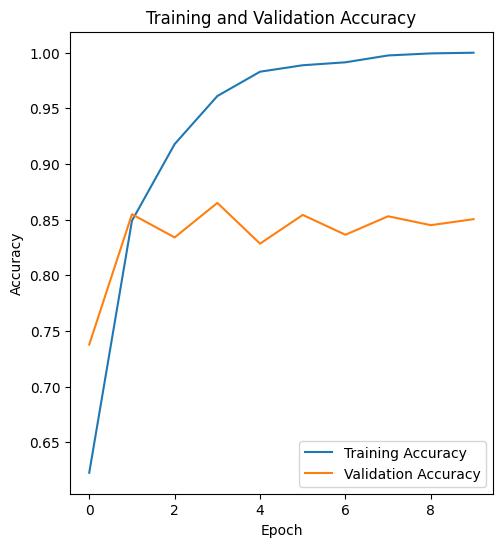

In [9]:
# --- 6. Visualize Training History (Optional) ---

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

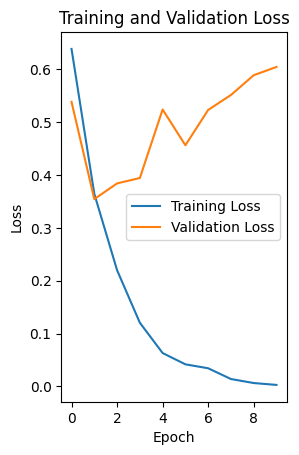

In [10]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()